# <center> Fase de Modelamiento <center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
# !(pip install chainladder)
import chainladder as cl # librería para realizar triángulos de pérdidas

print("pandas: " + pd.__version__)
print("numpy: " + np.__version__)
print("chainladder: " + cl.__version__)

pandas: 1.4.2
numpy: 1.22.0
chainladder: 0.8.18


## Ingreso de los Datos

In [2]:
data=pd.read_csv('wkcomp_pos.csv') # cargar o abrir un csv
display(data.head())

GRCODE               GRNAME  AccidentYear  DevelopmentYear  DevelopmentLag  \
0      86  Allstate Ins Co Grp          1988             1988               1   
1      86  Allstate Ins Co Grp          1988             1989               2   
2      86  Allstate Ins Co Grp          1988             1990               3   
3      86  Allstate Ins Co Grp          1988             1991               4   
4      86  Allstate Ins Co Grp          1988             1992               5   

   IncurLoss_D  CumPaidLoss_D  BulkLoss_D  EarnedPremDIR_D  EarnedPremCeded_D  \
0       367404          70571      127737           400699               5957   
1       362988         155905       60173           400699               5957   
2       347288         220744       27763           400699               5957   
3       330648         251595       15280           400699               5957   
4       354690         274156       27689           400699               5957   

   EarnedPremNet_D  Single  PostedReserve97_D  
0           394742       0             281872  
1           394742       0             281872  
2           394742       0             281872  
3           394742       0             281872  
4           394742       0             281872

Creamos un triángulo con los datos de entrada, para el análisis vamos a tomar únicamente las variables de pérdida

In [3]:
triangle = cl.Triangle(
    data,
    origin="AccidentYear", # filas
    development="DevelopmentYear", # columnas
    columns=data.columns[5:], # tomamos en cuenta solamente las columnas de ganancias y pérdidas
    index=["GRNAME"], # nombres de las compañías
    cumulative=False, # triángulo de pérdidas acumulado o no
)
triangle #objeto de pandas

Triangle Summary
Valuation:                                            2006-12
Grain:                                                   OYDY
Shape:                                       (132, 8, 19, 19)
Index:                                               [GRNAME]
Columns:    [IncurLoss_D, CumPaidLoss_D, BulkLoss_D, Earne...

## Preparación de los Datos

En el conjunto de datos los índices GRNAME están representados por 132 compañías de seguros diferentes. Se puede acceder a sus nombres usando index:

In [4]:
Businesses=[b[0] for b in triangle.index.values]
Businesses[:4]

['Agway Ins Co',
 'Alaska Nat Ins Co',
 'Alaska Timber Ins Exchange',
 'Allstate Ins Co Grp']

### Triángulos de pérdidas por cada compañía
* Z: Conjunto de los triángulos incrementales para cada negocio

* C: Conjunto de los triángulos acumulados para cada negocio

En el data set estos datos aparecen en las columnas IncurLoss_D y CumPaidLoss_D respectivamente.

In [5]:
Z={}
C={}
for b in Businesses:
    Z[b]=triangle['IncurLoss_D'].loc[b]
    C[b]=triangle['CumPaidLoss_D'].loc[b]

Mostramos los triángulos para algunas compañías:

In [6]:
for b in Businesses[:4]: print('Compañía',b);display(Z[b]);display(C[b])

Compañía Agway Ins Co


12    24    36    48    60    72    84    96    108   120  132  144  156  168  180  192  204  216  228
1988  27.0  28.0  28.0   3.0   6.0   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1989  23.0  24.0  23.0   5.0   5.0   NaN  23.0  23.0  31.0  31.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1990  19.0  19.0  19.0   7.0   2.0  16.0  16.0  23.0  23.0  23.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1991  18.0  34.0  45.0  45.0  18.0  35.0  44.0  39.0  41.0  40.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992  13.0  15.0  18.0   5.0   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1993  10.0   8.0   5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1994   8.0   7.0   6.0   NaN   NaN   3.0   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1995   5.0   5.0   NaN   8.0   5.0   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1996   7.0   NaN  10.0   5.0   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1997   NaN  10.0   8.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1998   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1999   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2001   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2002   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2003   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2004   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2005   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2006   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

12    24    36    48    60    72    84    96    108   120  132  144  156  168  180  192  204  216  228
1988  1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1989  NaN   NaN   NaN   NaN   NaN   NaN  23.0  23.0  31.0  31.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1990  NaN   2.0   2.0   2.0   2.0  16.0  16.0  23.0  23.0  23.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1991  8.0  17.0  25.0  31.0  26.0  29.0  38.0  39.0  39.0  35.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1993  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1994  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1995  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1996  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1997  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1998  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1999  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2001  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2002  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2003  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2004  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2005  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2006  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

Compañía Alaska Nat Ins Co


12       24       36       48       60       72       84       96       108      120  132  144  156  168  180  192  204  216  228
1988  18067.0  14876.0  13533.0  13018.0  12313.0  12463.0  12337.0  12105.0  12095.0  12071.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1989  22751.0  18769.0  17245.0  16212.0  15255.0  15064.0  15130.0  15153.0  15029.0  14815.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1990  24623.0  21477.0  21193.0  17493.0  17367.0  17049.0  16883.0  16801.0  16807.0  16729.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1991  29118.0  27588.0  26685.0  25047.0  24435.0  24026.0  23726.0  23499.0  23852.0  23832.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992  32403.0  31023.0  29269.0  28052.0  27269.0  26656.0  26760.0  25924.0  25883.0  25802.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1993  32722.0  30317.0  28365.0  26679.0  26105.0  25426.0  24559.0  24627.0  24217.0  24259.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1994  27119.0  26354.0  24818.0  23078.0  21982.0  21322.0  21129.0  21570.0  21070.0  21149.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1995  27682.0  28209.0  26628.0  24197.0  24214.0  23646.0  23489.0  23602.0  24403.0  24697.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1996  23861.0  22944.0  21079.0  20746.0  20131.0  19989.0  19786.0  19817.0  19805.0  20132.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1997  26171.0  26111.0  25468.0  24806.0  23822.0  24000.0  25058.0  25694.0  25830.0  25580.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1998      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1999      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2001      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2002      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2003      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2004      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2005      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2006      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

12       24       36       48       60       72       84       96       108      120  132  144  156  168  180  192  204  216  228
1988  4386.0   7912.0   9668.0  10502.0  10891.0  11181.0  11339.0  11422.0  11493.0  11513.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1989  5321.0  10223.0  12162.0  13051.0  13535.0  13734.0  13928.0  14022.0  14108.0  14152.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1990  4775.0  10594.0  13524.0  14837.0  15353.0  15557.0  15741.0  15882.0  16038.0  15918.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1991  6731.0  15173.0  18551.0  20392.0  21268.0  21878.0  22225.0  22378.0  22483.0  22562.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992  9166.0  18877.0  22168.0  23259.0  23949.0  24299.0  24402.0  24511.0  24575.0  24679.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1993  8321.0  16556.0  19539.0  21018.0  22158.0  22718.0  22923.0  23219.0  23298.0  23444.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1994  7045.0  14434.0  17173.0  18631.0  19194.0  19471.0  19716.0  19927.0  20176.0  20254.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1995  7332.0  15222.0  18450.0  19794.0  20738.0  21378.0  21681.0  22010.0  22375.0  22591.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1996  6599.0  12870.0  14997.0  16607.0  17208.0  17520.0  18059.0  18367.0  18472.0  18524.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1997  7048.0  14266.0  17702.0  19582.0  20711.0  21487.0  22301.0  22668.0  22889.0  23102.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1998     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1999     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2001     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2002     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2003     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2004     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2005     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2006     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

Compañía Alaska Timber Ins Exchange


12       24       36       48       60       72       84       96      108     120  132  144  156  168  180  192  204  216  228
1988   9045.0   8976.0   8373.0   7821.0   7360.0   7075.0   6826.0   6763.0  6697.0  6625.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1989  11746.0  10269.0   9446.0   8989.0   8465.0   8097.0   7766.0   7624.0  7508.0  7413.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1990  11327.0  11921.0  11338.0  10675.0  10496.0  10172.0  10027.0  10004.0  9924.0  9863.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1991  10168.0   9198.0   8283.0   7414.0   6950.0   7082.0   7102.0   6809.0  6731.0  6776.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992   7512.0   7664.0   6212.0   5406.0   5122.0   5010.0   5083.0   5016.0  5081.0  5047.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1993   8828.0   7460.0   6075.0   5509.0   5451.0   4676.0   4638.0   4708.0  4654.0  4599.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1994   7121.0   7511.0   6923.0   6743.0   6005.0   5862.0   5807.0   5912.0  5774.0  5693.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1995   6639.0   6974.0   7071.0   6173.0   6187.0   6183.0   6018.0   5996.0  5961.0  5978.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1996   5709.0   6266.0   6124.0   5909.0   5869.0   5767.0   5635.0   5498.0  5529.0  5592.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1997   5204.0   5283.0   4918.0   4936.0   4776.0   4745.0   4840.0   4944.0  4983.0  4839.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1998      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1999      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2001      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2002      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2003      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2004      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2005      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2006      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

12      24      36      48      60      72      84      96      108     120  132  144  156  168  180  192  204  216  228
1988  2270.0  4322.0  4981.0  5823.0  5917.0  5995.0  6001.0  6087.0  6138.0  6146.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1989  3040.0  4948.0  5891.0  6668.0  6837.0  6949.0  6851.0  6869.0  6921.0  6925.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1990  3637.0  6621.0  7703.0  8495.0  9025.0  9244.0  9302.0  9387.0  9001.0  8994.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1991  2259.0  4259.0  5485.0  5870.0  6005.0  6127.0  6242.0  6400.0  6401.0  6418.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992  1644.0  3218.0  3989.0  4303.0  4332.0  4354.0  4550.0  4589.0  4668.0  4693.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1993  1399.0  2865.0  4117.0  4391.0  4610.0  3948.0  4102.0  4157.0  4191.0  4190.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1994  1461.0  4164.0  5042.0  5392.0  5103.0  5177.0  5236.0  5275.0  5325.0  5349.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1995  2257.0  4648.0  5559.0  5271.0  5542.0  5630.0  5655.0  5657.0  5665.0  5669.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1996  2342.0  4342.0  4557.0  4926.0  5090.0  5116.0  5152.0  5170.0  5135.0  5147.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1997  1778.0  3068.0  3704.0  4246.0  4316.0  4373.0  4400.0  4485.0  4522.0  4546.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1998     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1999     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2001     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2002     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2003     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2004     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2005     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2006     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

Compañía Allstate Ins Co Grp


12        24        36        48        60        72        84        96        108       120  132  144  156  168  180  192  204  216  228
1988  367404.0  362988.0  347288.0  330648.0  354690.0  350092.0  346808.0  349124.0  348157.0  347762.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1989  336928.0  316483.0  278496.0  303033.0  299496.0  295061.0  299251.0  297492.0  300620.0  296626.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1990  289198.0  311381.0  277980.0  277732.0  276563.0  278067.0  276704.0  281101.0  278023.0  279032.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1991  297174.0  277209.0  269739.0  272666.0  271318.0  267578.0  269592.0  267745.0  266677.0  264467.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992  181796.0  205079.0  199106.0  187833.0  185663.0  184940.0  184507.0  184705.0  183888.0  181261.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1993  114807.0  114774.0  101460.0   98430.0   96930.0   96121.0   98085.0   93795.0   93753.0   95363.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1994  107934.0  107569.0   97730.0   96185.0   96124.0   95821.0   95722.0   95496.0   96374.0   95766.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1995  100686.0   94456.0   92314.0   92241.0   92929.0   92214.0   92107.0   92362.0   91470.0   93060.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1996   53381.0   51205.0   51087.0   51015.0   50226.0   50343.0   50060.0   49564.0   49739.0   49459.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1997    6725.0    6663.0    6473.0    2917.0    2933.0    3103.0    3002.0    2909.0    2907.0    2909.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1998       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1999       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2001       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2002       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2003       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2004       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2005       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2006       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

12        24        36        48        60        72        84        96        108       120  132  144  156  168  180  192  204  216  228
1988  70571.0  155905.0  220744.0  251595.0  274156.0  287676.0  298499.0  304873.0  321808.0  325322.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1989  66547.0  136447.0  179142.0  211343.0  231430.0  244750.0  254557.0  270059.0  273873.0  277574.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1990  52233.0  133370.0  178444.0  204442.0  222193.0  232940.0  253337.0  256788.0  261166.0  263000.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1991  59315.0  128051.0  169793.0  196685.0  213165.0  234676.0  239195.0  245499.0  247131.0  248319.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992  39991.0   89873.0  114117.0  133003.0  154362.0  159496.0  164013.0  166212.0  167397.0  168844.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1993  19744.0   47229.0   61909.0   85099.0   87215.0   88602.0   89444.0   89899.0   90446.0   90686.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1994  20379.0   46773.0   88636.0   91077.0   92583.0   93346.0   93897.0   94165.0   94558.0   94730.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1995  18756.0   84712.0   87311.0   89200.0   90001.0   90247.0   90687.0   91068.0   91001.0   91161.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1996  42609.0   44916.0   46981.0   47899.0   48583.0   49109.0   49442.0   49073.0   49161.0   49255.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1997    691.0    2085.0    2795.0    2866.0    2905.0    2909.0    2908.0    2909.0    2909.0    2909.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1998      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1999      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2001      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2002      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2003      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2004      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2005      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2006      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

Observamos que algunos de los triángulos están incompletos para algún año de inicio y algún año de desarrollo, meintras que algunos tienen completa la parte inferior de sus respectivos triángulos

## Gráfica de pérdidas acumuladas
Estas las realizamos para cada año de desarrollo y para las primeras 8 compañías en el listado

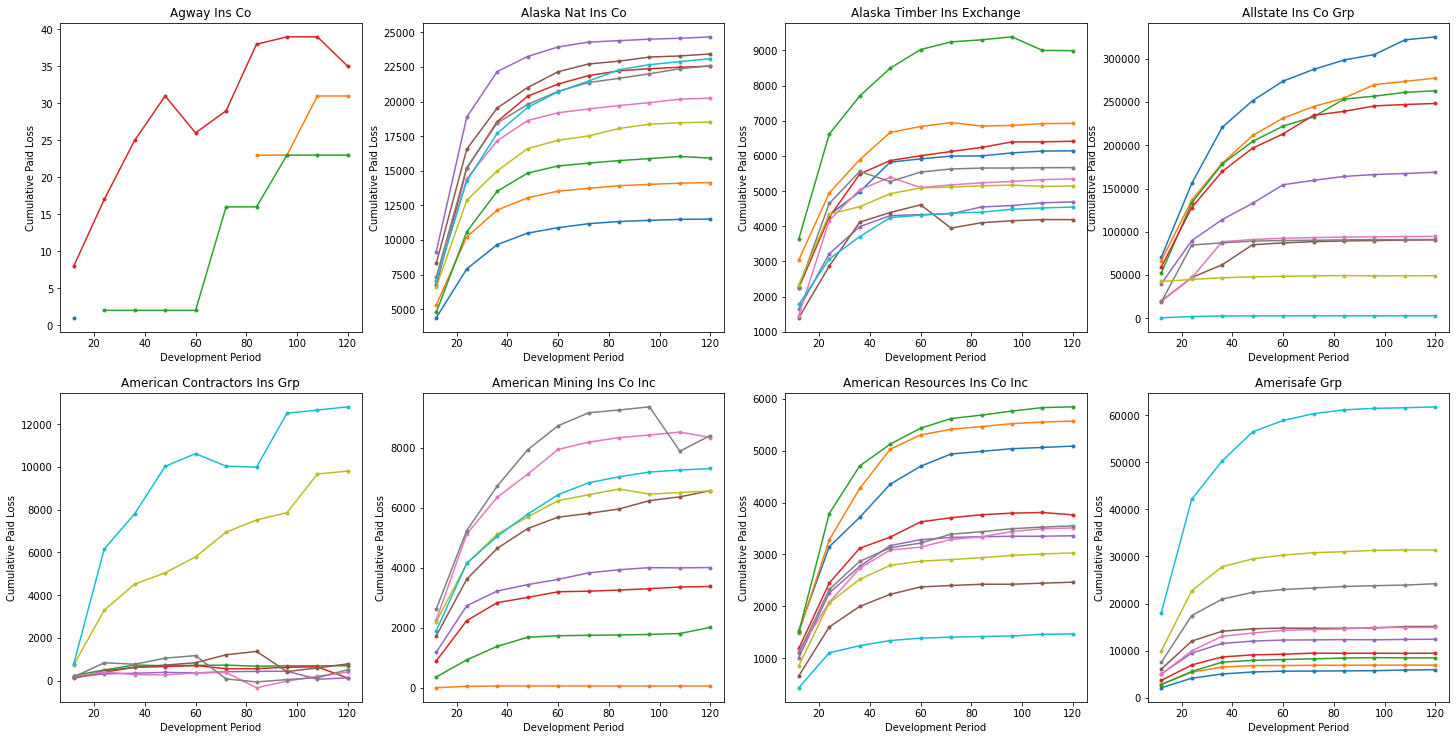

In [7]:
#3.4. Plot cumulative paid loss triangles

fig, ax = plt.subplots(2,4,figsize=(20, 10))


plt.tight_layout(pad=1.0, w_pad=3.0, h_pad=4.0)
for i in range(2):
    for j in range(4):
        b=Businesses[4*i+j]
        ax[i,j].plot(C[b].T,marker='.')
        ax[i,j].set_title(b)
        ax[i,j].set_ylabel('Cumulative Paid Loss')
        ax[i,j].set_xlabel('Development Period')

Se observa como Agway Ins Co, la primer compañía tiene bastantes datos incompletos.

## Cálculo del triángulo total

Inicialmente, trabajaremos con el triángulo total para observar el comportamiento global de las pérdidas acumuladas.

In [8]:
total_cum=triangle['CumPaidLoss_D'].sum()
total_cum

12        24         36         48         60         72         84         96         108        120  132  144  156  168  180  192  204  216  228
1988  285804.0  638532.0   865100.0   996363.0  1084351.0  1133188.0  1169749.0  1196917.0  1229203.0  1241715.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1989  307720.0  684140.0   916996.0  1065674.0  1154072.0  1210479.0  1249886.0  1291512.0  1308706.0  1324671.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1990  320124.0  757479.0  1017144.0  1169014.0  1258975.0  1315368.0  1368374.0  1394675.0  1417384.0  1431483.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1991  347417.0  793749.0  1053414.0  1209556.0  1307164.0  1381645.0  1414747.0  1447121.0  1465508.0  1479177.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992  342982.0  781402.0  1014982.0  1172915.0  1281864.0  1328801.0  1370935.0  1399901.0  1419809.0  1437891.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1993  342385.0  743433.0   959147.0  1113314.0  1187581.0  1243689.0  1278194.0  1301968.0  1322101.0  1337171.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1994  351060.0  750392.0   993751.0  1114842.0  1193861.0  1243285.0  1276145.0  1302620.0  1321778.0  1340950.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1995  343841.0  768575.0   962081.0  1087925.0  1164217.0  1210269.0  1243983.0  1264903.0  1282868.0  1300678.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1996  381484.0  736040.0   937936.0  1056949.0  1131168.0  1182716.0  1218813.0  1239839.0  1260284.0  1274282.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1997  340132.0  730838.0   940850.0  1066652.0  1142476.0  1191886.0  1223282.0  1248906.0  1262903.0  1277512.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1998       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1999       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2001       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2002       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2003       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2004       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2005       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2006       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

## Cálculo de los development factors para el triángulo total
Se realiza mediante el método link_ratio y cuya fórmula es:
$$
\lambda_j=\frac{\sum_{i=1}^{t-j+1} C_{ij}}{\sum_{i=1}^{t-j+1} C_{i,j-1}}
$$
Con t el último período de desarrollo. 

Básicamente, el lambda siguiente se calcula mediante las pérdidas acumuladas del período anterior.

In [9]:
print('age-to-age factors:')
display(total_cum.link_ratio.heatmap(cmap='Reds'))

age-to-age factors:


## Independencia de los Períodos y de los desarrollos 

Períodos: Filas, ver origin  o AccidentYear
Desarrollos: Columnas, ver DevelopmentYear (respecto al origin)

Realizamos el test de Mack para saber si tanto las filas (períodos) como las columnas (development) son independientes entre si. Para los períodos usamos el z_critical y para los desarrollos el t_critical.

In [11]:
print(total_cum.origin)
print(total_cum.development.values)

PeriodIndex(['1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
             '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
             '2004', '2005', '2006'],
            dtype='period[A-DEC]', name='origin')
[ 12  24  36  48  60  72  84  96 108 120 132 144 156 168 180 192 204 216
 228]


Estos tests se puede hacer para el total:

In [15]:
# display(total.valuation_correlation(0.05,total=True).z_critical)
# display(total.development_correlation(0.5,total=True).t_critical)
#for my whole data
print(
    "¿Los años de evaluación y los orígenes está correlacionados?",
    total_cum.valuation_correlation(p_critical=0.05, total=True).z_critical.values,
)
print(
    "¿Están correlacionados los años de desarrollo?",
    total_cum.development_correlation(p_critical=0.5).t_critical.values,
)

¿Los años de evaluación y los orígenes está correlacionados? [[False]]
¿Están correlacionados los años de desarrollo? [[ True]]


/home/john/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


O para cada año:

In [16]:
display(total_cum.valuation_correlation(0.05,total=False).z_critical)

/home/john/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


1989   1990   1991   1992   1993   1994   1995  1996  1997   1998   1999  2000   2001   2002   2003   2004   2005   2006
1988  False  False  False  False  False  False  False  True  True  False  False  True  False  False  False  False  False  False

Para el total es lo que precisamente esperabamos, que los años de valuación no estén correlacionados. Sin embargo, al mirar la correlación en los años 1996 y 1997 vemos que se correlacionan. Por lo que los datos no son tan confiables en este caso.

## Ajuste para el triángulo total

Queremos predecir los valores de las pérdidas acumuladas para los siguientes períodos en el triángulo

In [17]:
model=cl.Chainladder().fit(total_cum) #Creación del modelo de ajuste

Predicciones para los últimos valores

In [26]:
display(model.ultimate_)#.to_frame()

2261
1988   51459.0
1989   63045.0
1990   74242.0
1991   84971.0
1992  112128.0
1993  136266.0
1994  129952.0
1995  210168.0
1996  276185.0
1997  532060.0
1998       NaN
1999       NaN
2000       NaN
2001       NaN
2002       NaN
2003       NaN
2004       NaN
2005       NaN
2006       NaN

## Estimaciones de los factores de pérdida $\lambda$ (loss development factors ldf)

In [27]:
display(model.ldf_)

12-24    24-36     36-48     48-60     60-72     72-84    84-96    96-108   108-120  120-132  132-144  144-156  156-168  168-180  180-192  192-204  204-216  216-228  228-240  240-252
(All)  3.155585  1.83189  1.488471  1.337901  1.256499  1.206055  1.17202  1.147359  1.128898      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0

In [29]:
display(model.cdf_)

12-Ult    24-Ult   36-Ult    48-Ult    60-Ult    72-Ult    84-Ult    96-Ult   108-Ult  120-Ult  132-Ult  144-Ult  156-Ult  168-Ult  180-Ult  192-Ult  204-Ult  216-Ult  228-Ult  240-Ult
(All)  26.482704  8.392327  4.58124  3.077817  2.300481  1.830865  1.518061  1.295252  1.128898      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0

In [ ]:
display(cl.Development(n_periods=[8, 2
                        , 6, 5, -1, 2, -1, -1, 5]).fit(total).ldf_)

## Pérdidas incurridas pero no reportadas (En inglés: losses incurred but not reported INBR)

In [19]:
display(model.ibnr_)

2261
1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
1993   NaN
1994   NaN
1995   NaN
1996   NaN
1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN

In [30]:
transformed_triangle = cl.Development(drop_high=[True] * 4 + [False] * 5).fit_transform(
    total_cum
)
transformed_triangle

12        24         36         48         60         72         84         96         108        120  132  144  156  168  180  192  204  216  228
1988  285804.0  638532.0   865100.0   996363.0  1084351.0  1133188.0  1169749.0  1196917.0  1229203.0  1241715.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1989  307720.0  684140.0   916996.0  1065674.0  1154072.0  1210479.0  1249886.0  1291512.0  1308706.0  1324671.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1990  320124.0  757479.0  1017144.0  1169014.0  1258975.0  1315368.0  1368374.0  1394675.0  1417384.0  1431483.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1991  347417.0  793749.0  1053414.0  1209556.0  1307164.0  1381645.0  1414747.0  1447121.0  1465508.0  1479177.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1992  342982.0  781402.0  1014982.0  1172915.0  1281864.0  1328801.0  1370935.0  1399901.0  1419809.0  1437891.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1993  342385.0  743433.0   959147.0  1113314.0  1187581.0  1243689.0  1278194.0  1301968.0  1322101.0  1337171.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1994  351060.0  750392.0   993751.0  1114842.0  1193861.0  1243285.0  1276145.0  1302620.0  1321778.0  1340950.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1995  343841.0  768575.0   962081.0  1087925.0  1164217.0  1210269.0  1243983.0  1264903.0  1282868.0  1300678.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1996  381484.0  736040.0   937936.0  1056949.0  1131168.0  1182716.0  1218813.0  1239839.0  1260284.0  1274282.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1997  340132.0  730838.0   940850.0  1066652.0  1142476.0  1191886.0  1223282.0  1248906.0  1262903.0  1277512.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1998       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1999       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2001       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2002       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2003       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2004       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2005       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2006       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [31]:
#Our transformed triangle behaves as our original genins triangle. However, notice the link_ratios exclude any droppped values you specified.
transformed_triangle.link_ratio.heatmap()

In [37]:
cl.Development(drop_high=8, drop_low=2, preserve=4).fit(total_cum).ldf_

/home/john/anaconda3/lib/python3.9/site-packages/chainladder/development/base.py:523: UserWarning: Some exclusions have been ignored. At least 4 link ratio(s) is required for development estimation.
  warnings.warn(warning)
/home/john/anaconda3/lib/python3.9/site-packages/chainladder/development/base.py:204: UserWarning: Some exclusions have been ignored. At least 4 link ratio(s) is required for development estimation.
  warnings.warn(warning)


12-24     24-36     36-48     48-60     60-72     72-84     84-96    96-108   108-120  120-132  132-144  144-156  156-168  168-180  180-192  192-204  204-216  216-228
(All)  3.195864  1.898942  1.541587  1.378415  1.286879  1.229606  1.190728  1.162652  1.141529      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0

In [32]:
print(type(transformed_triangle))
transformed_triangle.latest_diagonal

<class 'chainladder.core.triangle.Triangle'>


2006
1988        NaN
1989        NaN
1990        NaN
1991        NaN
1992        NaN
1993        NaN
1994        NaN
1995        NaN
1996        NaN
1997  1277512.0
1998        NaN
1999        NaN
2000        NaN
2001        NaN
2002        NaN
2003        NaN
2004        NaN
2005        NaN
2006        NaN

La diferencia entre los dos triángulos (triangle['CumPaidLoss'] y triángulo estimado) se refiere a cómo han desarrollado las reclamaciones con el tiempo y cómo se ajustan los valores en el segundo triángulo estimado en comparación con los valores reales en el primer triángulo.

El primer triángulo representa los datos históricos reales de desarrollo de reclamaciones para varios años de accidentes y diferentes períodos de desarrollo después del año del accidente. Cada celda en el triángulo muestra el factor de desarrollo acumulativo para un año de accidente y período de desarrollo específico. Los valores en cada celda indican cuánto se han desarrollado las reclamaciones con el tiempo para ese año de accidente y período de desarrollo.

El segundo triángulo, en cambio, es una estimación basada en los datos originales y en los factores de desarrollo acumulativo proporcionados. Los valores en el segundo triángulo representan estimaciones de cómo se espera que se desarrollen las reclamaciones con el tiempo para los mismos años de accidente y períodos de desarrollo. Estas estimaciones se basan en los factores acumulativos proporcionados y se utilizan para predecir los montos de reclamaciones futuras.

La diferencia entre los dos triángulos radica en cuán bien se ajustan las estimaciones en el segundo triángulo a los datos reales en el primer triángulo. Un buen ajuste significaría que las estimaciones se acercan a los valores reales, lo que indica que el modelo utilizado para las estimaciones es confiable. Una mala ajuste se vería en grandes diferencias entre las estimaciones y los valores reales, lo que podría sugerir que el modelo necesita mejoras o ajustes.

## Cálculo de los development factors para cada triángulo
Se realiza mediante el método link_ratio y cuya fórmula es:
$$
\lambda_j=\frac{\sum_{i=1}^{t-j+1} C_{ij}}{\sum_{i=1}^{t-j+1} C_{i,j-1}}
$$
Con t el último período de desarrollo. 

Básicamente, el lambda siguiente se calcula mediante las pérdidas acumuladas del período anterior.

In [20]:
for i,b in enumerate(Businesses[:8]):
    print( b +' age-to-age factors:')
    display(C[b].link_ratio.heatmap(cmap='Reds'))

Agway Ins Co age-to-age factors:


Alaska Nat Ins Co age-to-age factors:


Alaska Timber Ins Exchange age-to-age factors:


Allstate Ins Co Grp age-to-age factors:


American Contractors Ins Grp age-to-age factors:


American Mining Ins Co Inc age-to-age factors:


American Resources Ins Co Inc age-to-age factors:


Amerisafe Grp age-to-age factors:


Para el test de validación vemos que para algunas compañías no se puede calcular, debido a la presencia de celdas vacías.

In [21]:
#Mack's test for the calendar year effect
for b in (Businesses[:8]):
    print( b +' Valuation correlation Test:')
    try:
        display(C[b].valuation_correlation(0.05).z_critical)
    except:
        print('')

Agway Ins Co Valuation correlation Test:


/home/john/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


ValueError: Shape of passed values is (1, 18), indices imply (1, 10)

ValueError: Shape of passed values is (1, 18), indices imply (1, 10)

Alaska Nat Ins Co Valuation correlation Test:


/home/john/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


1989   1990   1991   1992   1993   1994   1995   1996   1997   1998   1999   2000   2001   2002   2003   2004   2005   2006
1988  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False

Alaska Timber Ins Exchange Valuation correlation Test:


/home/john/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


1989   1990   1991   1992   1993   1994   1995   1996   1997   1998   1999  2000   2001   2002   2003   2004   2005   2006
1988  False  False  False  False  False  False  False  False  False  False  False  True  False  False  False  False  False  False

Allstate Ins Co Grp Valuation correlation Test:


/home/john/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


1989   1990   1991   1992   1993   1994   1995  1996   1997   1998   1999   2000   2001   2002   2003   2004   2005   2006
1988  False  False  False  False  False  False  False  True  False  False  False  False  False  False  False  False  False  False

American Contractors Ins Grp Valuation correlation Test:


/home/john/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


ValueError: Shape of passed values is (1, 18), indices imply (1, 17)

ValueError: Shape of passed values is (1, 18), indices imply (1, 17)

American Mining Ins Co Inc Valuation correlation Test:


/home/john/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


1989   1990   1991   1992   1993   1994   1995   1996   1997   1998   1999   2000   2001   2002   2003   2004   2005   2006
1988  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False

American Resources Ins Co Inc Valuation correlation Test:


/home/john/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


1989   1990   1991   1992   1993   1994   1995   1996   1997   1998   1999   2000   2001   2002   2003   2004   2005   2006
1988  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False

Amerisafe Grp Valuation correlation Test:


/home/john/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


1989   1990   1991   1992   1993  1994   1995   1996   1997   1998   1999   2000  2001   2002   2003   2004   2005   2006
1988  False  False  False  False  False  True  False  False  False  False  False  False  True  False  False  False  False  False

In [22]:
#Mack's test for the calendar year effect
for b in (Businesses[:8]):
    print( b +' Valuation correlation Test:')
    try:
        display(C[b].development_correlation(0.05).t_critical)
    except:
        print('')

Agway Ins Co Valuation correlation Test:


CumPaidLoss_D
GRNAME                     
Agway Ins Co           True

Alaska Nat Ins Co Valuation correlation Test:


CumPaidLoss_D
GRNAME                          
Alaska Nat Ins Co           True

Alaska Timber Ins Exchange Valuation correlation Test:


CumPaidLoss_D
GRNAME                                   
Alaska Timber Ins Exchange           True

Allstate Ins Co Grp Valuation correlation Test:


CumPaidLoss_D
GRNAME                            
Allstate Ins Co Grp           True

American Contractors Ins Grp Valuation correlation Test:


CumPaidLoss_D
GRNAME                                     
American Contractors Ins Grp           True

American Mining Ins Co Inc Valuation correlation Test:


CumPaidLoss_D
GRNAME                                   
American Mining Ins Co Inc           True

American Resources Ins Co Inc Valuation correlation Test:


CumPaidLoss_D
GRNAME                                      
American Resources Ins Co Inc           True

Amerisafe Grp Valuation correlation Test:


CumPaidLoss_D
GRNAME                      
Amerisafe Grp           True

In [23]:
model=cl.Chainladder()
for b in (Businesses[:8]):
    print(b + ' losses: ')  
#     cum_tri_df[b] = Z[b].incr_to_cum().to_frame()
#     display(C[b])
#     display(C[b].to_frame())
    display(model.fit(C[b]).ultimate_)#.to_frame()
    print(model.fit(C[b]).ibnr_)

Agway Ins Co losses: 


2261
1988    1.0
1989  108.0
1990  109.0
1991  287.0
1992    NaN
1993    NaN
1994    NaN
1995    NaN
1996    NaN
1997    NaN
1998    NaN
1999    NaN
2000    NaN
2001    NaN
2002    NaN
2003    NaN
2004    NaN
2005    NaN
2006    NaN

      2261
1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
1993   NaN
1994   NaN
1995   NaN
1996   NaN
1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
Alaska Nat Ins Co losses: 


2261
1988  100307.0
1989  124236.0
1990  138219.0
1991  193641.0
1992  219885.0
1993  203194.0
1994  176021.0
1995  191571.0
1996  159223.0
1997  191756.0
1998       NaN
1999       NaN
2000       NaN
2001       NaN
2002       NaN
2003       NaN
2004       NaN
2005       NaN
2006       NaN

      2261
1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
1993   NaN
1994   NaN
1995   NaN
1996   NaN
1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
Alaska Timber Ins Exchange losses: 


2261
1988  53680.0
1989  61899.0
1990  81409.0
1991  55466.0
1992  40340.0
1993  37970.0
1994  47524.0
1995  51553.0
1996  46977.0
1997  39438.0
1998      NaN
1999      NaN
2000      NaN
2001      NaN
2002      NaN
2003      NaN
2004      NaN
2005      NaN
2006      NaN

      2261
1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
1993   NaN
1994   NaN
1995   NaN
1996   NaN
1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
Allstate Ins Co Grp losses: 


2261
1988  2511149.0
1989  2145722.0
1990  2057913.0
1991  1981829.0
1992  1357308.0
1993   750273.0
1994   810144.0
1995   824144.0
1996   477028.0
1997    25886.0
1998        NaN
1999        NaN
2000        NaN
2001        NaN
2002        NaN
2003        NaN
2004        NaN
2005        NaN
2006        NaN

      2261
1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
1993   NaN
1994   NaN
1995   NaN
1996   NaN
1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
American Contractors Ins Grp losses: 


2261
1988      NaN
1989      NaN
1990   6325.0
1991   5018.0
1992   3011.0
1993   7082.0
1994   2094.0
1995   4677.0
1996  61201.0
1997  93455.0
1998      NaN
1999      NaN
2000      NaN
2001      NaN
2002      NaN
2003      NaN
2004      NaN
2005      NaN
2006      NaN

      2261
1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
1993   NaN
1994   NaN
1995   NaN
1996   NaN
1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
American Mining Ins Co Inc losses: 


2261
1988      NaN
1989    593.0
1990  15271.0
1991  28772.0
1992  34046.0
1993  52019.0
1994  70711.0
1995  75442.0
1996  56071.0
1997  59037.0
1998      NaN
1999      NaN
2000      NaN
2001      NaN
2002      NaN
2003      NaN
2004      NaN
2005      NaN
2006      NaN

      2261
1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
1993   NaN
1994   NaN
1995   NaN
1996   NaN
1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
American Resources Ins Co Inc losses: 


2261
1988  42559.0
1989  46899.0
1990  49303.0
1991  32554.0
1992  29219.0
1993  21022.0
1994  29245.0
1995  30032.0
1996  25954.0
1997  12674.0
1998      NaN
1999      NaN
2000      NaN
2001      NaN
2002      NaN
2003      NaN
2004      NaN
2005      NaN
2006      NaN

      2261
1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
1993   NaN
1994   NaN
1995   NaN
1996   NaN
1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
Amerisafe Grp losses: 


2261
1988   51459.0
1989   63045.0
1990   74242.0
1991   84971.0
1992  112128.0
1993  136266.0
1994  129952.0
1995  210168.0
1996  276185.0
1997  532060.0
1998       NaN
1999       NaN
2000       NaN
2001       NaN
2002       NaN
2003       NaN
2004       NaN
2005       NaN
2006       NaN

      2261
1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
1993   NaN
1994   NaN
1995   NaN
1996   NaN
1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
